# EDA / Feature Engineering

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 2105)
pd.set_option('display.max_rows',500)

In [2]:
# read in cleaned checkpoint
games = pd.read_csv('../Data/NoMissingGames.csv')

/var/folders/5t/bq10hvbn0zncjrr_1ppk5kp40000gn/T/ipykernel_5798/36508411.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.read_csv('../Data/NoMissingGames.csv')


In [3]:
games.head()

,date,num_of_games,day,visitor_team,v_league,v_game_num,home_team,h_league,h_game_num,v_runs,h_runs,total_outs,day_night,park_id,attndnce,game_mins,v_linescore,h_linescore,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_ci,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_ci,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,hp_ump_id,hp_ump_name,1b_ump_id,1b_ump_name,2b_ump_id,2bump_name,3b_ump_id,3b_ump_name,v_mngr_id,v_mngr_name,h_mngr_id,h_mngr_name,win_pitcher_id,win_pitcher_name,lose_pitch_id,lose_pitch_name,sve_pitch_id,sve_pitch_name,gwrbi_id,gwrbi_name,v_starter_id,v_starter_name,h_starter_id,h_starter_name,v_batter1_id,v_batter1_name,v_batter1_pos,v_batter2_id,v_batter2_name,v_batter2_pos,v_batter3_id,v_batter3_name,v_batter3_pos,v_batter4_id,v_batter4_name,v_batter4_pos,v_batter5_id,v_batter5_name,v_batter5_pos,v_batter6_id,v_batter6_name,v_batter6_pos,v_batter7_id,v_batter7_name,v_batter7_pos,v_batter8_id,v_batter8_name,v_batter8_pos,v_batter9_id,v_batter9_name,v_batter9_pos,h_batter1_id,h_batter1_name,h_batter1_pos,h_batter2_id,h_batter2_name,h_batter2_pos,h_batter3_id,h_batter3_name,h_batter3_pos,h_batter4_id,h_batter4_name,h_batter4_pos,h_batter5_id,h_batter5_name,h_batter5_pos,h_batter6_id,h_batter6_name,h_batter6_pos,h_batter7_id,h_batter7_name,h_batter7_pos,h_batter8_id,h_batter8_name,h_batter8_pos,h_batter9_id,h_batter9_name,h_batter9_pos,acqui,run_diff
0,19890403,0,Mon,BOS,AL,1,BAL,AL,1,4,5,64,D,BAL11,52161.0,232,00000310000,00010300001,40,10,3,0,1,4,2,0,0,3,1,5,1,1,0,0,8,5,5,5,0,0,31,14,0,0,2,0,40,12,2,0,1,5,0,0,0,4,0,7,1,1,2,0,8,3,4,4,0,0,33,13,0,1,0,0,denkd901,Don Denkinger,mccol901,Larry McCoy,pales901,Steve Palermo,merrd901,Durwood Merrill,morgj101,Joe Morgan,robif103,Frank Robinson,holtb001,Brian Holton,stanb001,Bob Stanley,None,(none),wortc001,Craig Worthington,clemr001,Roger Clemens,schmd001,Dave J. Schmidt,boggw001,Wade Boggs,5,barrm001,Marty Barrett,4,evand002,Dwight Evans,9,greem001,Mike Greenwell,7,burke001,Ellis Burks,8,ricej001,Jim Rice,10,esasn001,Nick Esasky,3,gedmr001,Rich Gedman,2,reedj003,Jody Reed,6,andeb001,Brady Anderson,8,bradp001,Phil Bradley,7,finls001,Steve Finley,9,ripkc001,Cal Ripken,6,sheel001,Larry Sheets,10,tettm001,Mickey Tettleton,2,trabj001,Jim Traber,3,wortc001,Craig Worthington,5,gonzr001,Rene Gonzales,4,Y,1
1,19890403,0,Mon,MIL,AL,1,CLE,AL,1,1,2,51,D,CLE07,40618.0,124,000010000,00200000x,30,5,0,0,0,1,1,0,0,0,0,7,0,1,0,0,3,1,1,1,0,0,24,10,1,0,1,0,31,8,1,0,0,2,0,0,0,1,0,4,0,0,0,0,6,2,1,1,0,0,27,9,0,0,0,0,barnl901,Larry Barnett,fordd901,Dale Ford,koscg901,Greg Kosc,hirsj901,John Hirschbeck,trebt801,Tom Trebelhorn,edwad102,Doc Edwards,swing001,Greg Swindell,augud001,Don August,joned001,Doug Jones,mcdoo001,Oddibe McDowell,augud001,Don August,swing001,Greg Swindell,polig001,Gus Polidor,5,shefg001,Gary Sheffield,6,younr001,Robin Yount,8,deerr001,Rob Deer,9,bragg001,Glenn Braggs,7,frant001,Terry Francona,3,meyej001,Joey Meyer,10,surhb001,B.J. Surhoff,2,gantj001,Jim Gantner,4,mcdoo001,Oddibe McDowell,7,browj001,Jerry Browne,4,cartj001,Joe Carter,8,obrip001,Pete O'Brien,3,snydc001,Cory Snyder,9,clard001,Dave Clark,10,jacob001,Brook Jacoby,5,allaa001,Andy Allanson,2,fermf001,Felix Fermin,6,Y,1
2,19890403,0,Mon,TOR,AL,1,KCA,AL,1,4,3,54,D,KAN06,38595.0,157,010200100,000000300,36,10,3,1,0,4,0,1,0,1,0,5,0,0,0,0,7,3,3,3,0,0,27,9,0,0,1,0,34,9,4,0,0,3,1,0,0,1,0,6,1,0,1,0,6,2,4,4,0,0,27,10,0,0,0,0,mckej901,Jim McKean,kaisk901,Ken Kaiser,voltv901,Vic Voltaggio,cousd901,Derryl Cousins,willj107,Jimy Williams,wathj001,John Wathan,key-j001,Jimmy Key,gubim001,Mark Gubicza,henkt001,Tom Henke,white002,Ernie Whitt,key-j001,Jimmy Key,gubim001,Mark Gubicza,mosel001,Lloyd Moseby,8,mullr001,Rance Mulliniks,5,fernt001,Tony Fernandez,6,bellg001,George Bell,7,mcgrf00

In [4]:
games.describe()

,date,num_of_games,v_game_num,h_game_num,v_runs,h_runs,total_outs,attndnce,game_mins,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_ci,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_ci,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,v_batter1_pos,v_batter2_pos,v_batter3_pos,v_batter4_pos,v_batter5_pos,v_batter6_pos,v_batter7_pos,v_batter8_pos,v_batter9_pos,h_batter1_pos,h_batter2_pos,h_batter3_pos,h_batter4_pos,h_batter5_pos,h_batter6_pos,h_batter7_pos,h_batter8_pos,h_batter9_pos,run_diff
count,7.804500e+04,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.00000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000,78045.000000
mean,2.005774e+07,0.041245,80.170837,80.176180,4.517458,4.643372,53.516702,28589.661657,178.170965,34.944878,8.930681,1.745800,0.172721,1.037555,4.290384,0.297610,0.272625,0.333116,3.213249,0.234390,7.265821,0.611724,0.267243,0.778218,0.005484,7.047985,3.700327,4.266987,4.259094,0.339650,0.039208,26.005868,9.786405,0.652034,0.071702,0.887885,0.000820,33.350605,8.802191,1.719149,0.19704,1.037837,4.409905,0.305311,0.281786,0.334269,3.341803,0.255737,6.654494,0.609174,0.242258,0.743456,0.005971,6.979768,3.832789,4.139868,4.132731,0.328733,0.037363,27.510833,10.321456,0.647011,0.071728,0.927696,0.000923,6.644026,5.923083,6.178948,6.081017,5.968083,5.757563,5.251944,4.640912,3.142008,6.640259,5.921148,6.199334,6.073573,5.969646,5.763611,5.258236,4.613659,3.147774,0.125915
std,9.555135e+04,0.258925,46.603772,46.604152,3.204839,3.124915,4.968763,12068.971290,27.653700,4.355574,3.572838,1.399477,0.426520,1.094334,3.100304,0.565961,0.529877,0.598566,2.087129,0.523759,2.966389,0.915635,0.516911,0.860006,0.074714,2.659160,1.371965,2.979488,2.973306,0.614358,0.202048,2.836839,3.186688,0.840850,0.277843,0.911005,0.029069,4.165444,3.349054,1.370487,0.45162,1.078651,3.028548,0.570748,0.535441,0.594678,2.120064,0.555060,2.903211,0.916348,0.492403,0.840531,0.078524,2.661322,1.398936,3.037524,3.032502,0.601197,0.196747,2.313236,3.253955,0.846902,0.276311,0.931712,0.030360,1.815388,1.978529,2.516602,2.736780,2.651183,2.561063,2.514549,2.377822,2.592478,1.822845,1.976823,2.520263,2.733948,2.648228,2.552418,2.518400,2.374779,2.592556,4.366555
min,1.989040e+07,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,-1.000000,74.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0

In [5]:
games.dtypes

date                  int64
num_of_games          int64
day                  object
visitor_team         object
v_league             object
v_game_num            int64
home_team            object
h_league             object
h_game_num            int64
v_runs                int64
h_runs                int64
total_outs            int64
day_night            object
park_id              object
attndnce            float64
game_mins             int64
v_linescore          object
h_linescore          object
v_abs                 int64
v_hits                int64
v_2b                  int64
v_3b                  int64
v_hr                  int64
v_rbis                int64
v_sacbunt             int64
v_sacfly              int64
v_hbp                 int64
v_bb                  int64
v_ibb                 int64
v_k                   int64
v_sb                  int64
v_cs                  int64
v_gidp                int64
v_ci                  int64
v_lob                 int64
v_p_used            

In [6]:
# dropping other irrelevant or repetitive columns
games = games.drop(columns = ['attndnce', 'game_mins','v_linescore','h_linescore','hp_ump_id','hp_ump_name','1b_ump_id','1b_ump_name','2b_ump_id', 
                              '2bump_name','3b_ump_id','3b_ump_name', 'gwrbi_id','gwrbi_name', 'acqui'])

In [7]:
# make run_diff absolute value
games.run_diff = games.run_diff.abs()

In [8]:
games['total'] = games['v_runs'] + games['h_runs']
games.head()

,date,num_of_games,day,visitor_team,v_league,v_game_num,home_team,h_league,h_game_num,v_runs,h_runs,total_outs,day_night,park_id,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_ci,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_ci,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,v_mngr_id,v_mngr_name,h_mngr_id,h_mngr_name,win_pitcher_id,win_pitcher_name,lose_pitch_id,lose_pitch_name,sve_pitch_id,sve_pitch_name,v_starter_id,v_starter_name,h_starter_id,h_starter_name,v_batter1_id,v_batter1_name,v_batter1_pos,v_batter2_id,v_batter2_name,v_batter2_pos,v_batter3_id,v_batter3_name,v_batter3_pos,v_batter4_id,v_batter4_name,v_batter4_pos,v_batter5_id,v_batter5_name,v_batter5_pos,v_batter6_id,v_batter6_name,v_batter6_pos,v_batter7_id,v_batter7_name,v_batter7_pos,v_batter8_id,v_batter8_name,v_batter8_pos,v_batter9_id,v_batter9_name,v_batter9_pos,h_batter1_id,h_batter1_name,h_batter1_pos,h_batter2_id,h_batter2_name,h_batter2_pos,h_batter3_id,h_batter3_name,h_batter3_pos,h_batter4_id,h_batter4_name,h_batter4_pos,h_batter5_id,h_batter5_name,h_batter5_pos,h_batter6_id,h_batter6_name,h_batter6_pos,h_batter7_id,h_batter7_name,h_batter7_pos,h_batter8_id,h_batter8_name,h_batter8_pos,h_batter9_id,h_batter9_name,h_batter9_pos,run_diff,total
0,19890403,0,Mon,BOS,AL,1,BAL,AL,1,4,5,64,D,BAL11,40,10,3,0,1,4,2,0,0,3,1,5,1,1,0,0,8,5,5,5,0,0,31,14,0,0,2,0,40,12,2,0,1,5,0,0,0,4,0,7,1,1,2,0,8,3,4,4,0,0,33,13,0,1,0,0,morgj101,Joe Morgan,robif103,Frank Robinson,holtb001,Brian Holton,stanb001,Bob Stanley,None,(none),clemr001,Roger Clemens,schmd001,Dave J. Schmidt,boggw001,Wade Boggs,5,barrm001,Marty Barrett,4,evand002,Dwight Evans,9,greem001,Mike Greenwell,7,burke001,Ellis Burks,8,ricej001,Jim Rice,10,esasn001,Nick Esasky,3,gedmr001,Rich Gedman,2,reedj003,Jody Reed,6,andeb001,Brady Anderson,8,bradp001,Phil Bradley,7,finls001,Steve Finley,9,ripkc001,Cal Ripken,6,sheel001,Larry Sheets,10,tettm001,Mickey Tettleton,2,trabj001,Jim Traber,3,wortc001,Craig Worthington,5,gonzr001,Rene Gonzales,4,1,9
1,19890403,0,Mon,MIL,AL,1,CLE,AL,1,1,2,51,D,CLE07,30,5,0,0,0,1,1,0,0,0,0,7,0,1,0,0,3,1,1,1,0,0,24,10,1,0,1,0,31,8,1,0,0,2,0,0,0,1,0,4,0,0,0,0,6,2,1,1,0,0,27,9,0,0,0,0,trebt801,Tom Trebelhorn,edwad102,Doc Edwards,swing001,Greg Swindell,augud001,Don August,joned001,Doug Jones,augud001,Don August,swing001,Greg Swindell,polig001,Gus Polidor,5,shefg001,Gary Sheffield,6,younr001,Robin Yount,8,deerr001,Rob Deer,9,bragg001,Glenn Braggs,7,frant001,Terry Francona,3,meyej001,Joey Meyer,10,surhb001,B.J. Surhoff,2,gantj001,Jim Gantner,4,mcdoo001,Oddibe McDowell,7,browj001,Jerry Browne,4,cartj001,Joe Carter,8,obrip001,Pete O'Brien,3,snydc001,Cory Snyder,9,clard001,Dave Clark,10,jacob001,Brook Jacoby,5,allaa001,Andy Allanson,2,fermf001,Felix Fermin,6,1,3
2,19890403,0,Mon,TOR,AL,1,KCA,AL,1,4,3,54,D,KAN06,36,10,3,1,0,4,0,1,0,1,0,5,0,0,0,0,7,3,3,3,0,0,27,9,0,0,1,0,34,9,4,0,0,3,1,0,0,1,0,6,1,0,1,0,6,2,4,4,0,0,27,10,0,0,0,0,willj107,Jimy Williams,wathj001,John Wathan,key-j001,Jimmy Key,gubim001,Mark Gubicza,henkt001,Tom Henke,key-j001,Jimmy Key,gubim001,Mark Gubicza,mosel001,Lloyd Moseby,8,mullr001,Rance Mulliniks,5,fernt001,Tony Fernandez,6,bellg001,George Bell,7,mcgrf001,Fred McGriff,3,barfj001,Jesse Barfield,9,white002,Ernie Whitt,2,lirin001,Nelson Liriano,10,lee-m001,Manuel Lee,4,wilsw001,Willie Wilson,8,seitk001,Kevin Seitzer,5,bretg001,George Brett,3,tartd001,Danny Tartabull,9,tablp001,Pat Tabler,10,jackb001,Bo Jackson,7,boonb001,Bob Boone,2,whitf001,Frank White,4,stilk001,Kurt Stillwell,6,1,7
3,19890403,0,Mon,SEA,AL,1,OAK,AL,1,2,3,51,N,OAK01,32,5,1,0,0,2,0,0,0,2,0,6,0,0,1,0,5,1,3,3,0,0,24,13,1,0,1,0,28,6,1,0,1,3,0,1,1,1,0,2,1,0,1,0,4,4,1,1,0,0,27,5,1,0,1,0,lefej101,Jim Lefebvre,larut101,Tony LaRussa,stewd001,Dave Stewart,langm001,Mark Langst

In [9]:
# adding combined features
games['v_ba'] = round(games['v_hits'] / games['v_abs'], 3)
games['h_ba'] = round(games['h_hits'] / games['h_abs'],3)
games['v_obp'] = round((games['v_hits'] + games['v_hbp'] + games['v_bb'] + games['v_ibb'])/ games['v_abs'],3)
games['h_obp'] = round((games['h_hits'] + games['h_hbp'] + games['h_bb'] + games['h_ibb'])/ games['h_abs'],3)
games['v_1b'] = games['v_hits'] - (games['v_2b'] + games['v_3b'] + games['v_hr'])
games['h_1b'] = games['h_hits'] - (games['h_2b'] + games['h_3b'] + games['h_hr'])
games['v_tbs'] = games['v_1b'] + games['v_2b']*2 + games['v_3b']*3 + games['v_hr']*4
games['h_tbs'] = games['h_1b'] + games['h_2b']*2 + games['h_3b']*3 + games['h_hr']*4
games['v_slg'] = round(games['v_tbs'] / games['v_abs'],3)
games['h_slg'] = round(games['h_tbs'] / games['h_abs'],3)
games['v_ops'] = games['v_obp'] + games['v_slg']
games['h_ops'] = games['h_obp'] + games['h_slg']

In [10]:
games

,date,num_of_games,day,visitor_team,v_league,v_game_num,home_team,h_league,h_game_num,v_runs,h_runs,total_outs,day_night,park_id,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_ci,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_ci,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,v_mngr_id,v_mngr_name,h_mngr_id,h_mngr_name,win_pitcher_id,win_pitcher_name,lose_pitch_id,lose_pitch_name,sve_pitch_id,sve_pitch_name,v_starter_id,v_starter_name,h_starter_id,h_starter_name,v_batter1_id,v_batter1_name,v_batter1_pos,v_batter2_id,v_batter2_name,v_batter2_pos,v_batter3_id,v_batter3_name,v_batter3_pos,v_batter4_id,v_batter4_name,v_batter4_pos,v_batter5_id,v_batter5_name,v_batter5_pos,v_batter6_id,v_batter6_name,v_batter6_pos,v_batter7_id,v_batter7_name,v_batter7_pos,v_batter8_id,v_batter8_name,v_batter8_pos,v_batter9_id,v_batter9_name,v_batter9_pos,h_batter1_id,h_batter1_name,h_batter1_pos,h_batter2_id,h_batter2_name,h_batter2_pos,h_batter3_id,h_batter3_name,h_batter3_pos,h_batter4_id,h_batter4_name,h_batter4_pos,h_batter5_id,h_batter5_name,h_batter5_pos,h_batter6_id,h_batter6_name,h_batter6_pos,h_batter7_id,h_batter7_name,h_batter7_pos,h_batter8_id,h_batter8_name,h_batter8_pos,h_batter9_id,h_batter9_name,h_batter9_pos,run_diff,total,v_ba,h_ba,v_obp,h_obp,v_1b,h_1b,v_tbs,h_tbs,v_slg,h_slg,v_ops,h_ops
0,19890403,0,Mon,BOS,AL,1,BAL,AL,1,4,5,64,D,BAL11,40,10,3,0,1,4,2,0,0,3,1,5,1,1,0,0,8,5,5,5,0,0,31,14,0,0,2,0,40,12,2,0,1,5,0,0,0,4,0,7,1,1,2,0,8,3,4,4,0,0,33,13,0,1,0,0,morgj101,Joe Morgan,robif103,Frank Robinson,holtb001,Brian Holton,stanb001,Bob Stanley,None,(none),clemr001,Roger Clemens,schmd001,Dave J. Schmidt,boggw001,Wade Boggs,5,barrm001,Marty Barrett,4,evand002,Dwight Evans,9,greem001,Mike Greenwell,7,burke001,Ellis Burks,8,ricej001,Jim Rice,10,esasn001,Nick Esasky,3,gedmr001,Rich Gedman,2,reedj003,Jody Reed,6,andeb001,Brady Anderson,8,bradp001,Phil Bradley,7,finls001,Steve Finley,9,ripkc001,Cal Ripken,6,sheel001,Larry Sheets,10,tettm001,Mickey Tettleton,2,trabj001,Jim Traber,3,wortc001,Craig Worthington,5,gonzr001,Rene Gonzales,4,1,9,0.250,0.300,0.350,0.400,6,9,16,17,0.400,0.425,0.750,0.825
1,19890403,0,Mon,MIL,AL,1,CLE,AL,1,1,2,51,D,CLE07,30,5,0,0,0,1,1,0,0,0,0,7,0,1,0,0,3,1,1,1,0,0,24,10,1,0,1,0,31,8,1,0,0,2,0,0,0,1,0,4,0,0,0,0,6,2,1,1,0,0,27,9,0,0,0,0,trebt801,Tom Trebelhorn,edwad102,Doc Edwards,swing001,Greg Swindell,augud001,Don August,joned001,Doug Jones,augud001,Don August,swing001,Greg Swindell,polig001,Gus Polidor,5,shefg001,Gary Sheffield,6,younr001,Robin Yount,8,deerr001,Rob Deer,9,bragg001,Glenn Braggs,7,frant001,Terry Francona,3,meyej001,Joey Meyer,10,surhb001,B.J. Surhoff,2,gantj001,Jim Gantner,4,mcdoo001,Oddibe McDowell,7,browj001,Jerry Browne,4,cartj001,Joe Carter,8,obrip001,Pete O'Brien,3,snydc001,Cory Snyder,9,clard001,Dave Clark,10,jacob001,Brook Jacoby,5,allaa001,Andy Allanson,2,fermf001,Felix Fermin,6,1,3,0.167,0.258,0.167,0.290,5,7,5,9,0.167,0.290,0.334,0.580
2,19890403,0,Mon,TOR,AL,1,KCA,AL,1,4,3,54,D,KAN06,36,10,3,1,0,4,0,1,0,1,0,5,0,0,0,0,7,3,3,3,0,0,27,9,0,0,1,0,34,9,4,0,0,3,1,0,0,1,0,6,1,0,1,0,6,2,4,4,0,0,27,10,0,0,0,0,willj107,Jimy Williams,wathj001,John Wathan,key-j001,Jimmy Key,gubim001,Mark Gubicza,henkt001,Tom Henke,key-j001,Jimmy Key,gubim001,Mark Gubicza,mosel001,Lloyd Moseby,8,mullr001,Rance Mulliniks,5,fernt001,Tony Fernandez,6,bellg001,George Bell,7,mcgrf001,Fred McGriff,3,barfj001,Jesse Barfield,9,white002,Ernie Whitt,2,lirin001,Nelson Liriano,10,lee-m001,Manuel Lee,4,wilsw001,Willie Wilson,8,seitk001,Kevin Seitzer,5,bretg001,George Brett,3,tartd001,Danny Tartabull,9,tablp001,Pat Tabler,10,jackb001,Bo Jackson,7,boonb001,Bob Boone,2,whitf001,Frank White,4,stilk001,Kurt Stillwell,6,1,7,0.278,0.265,0.306,0.294,6,5,15,13,0.417,0.382,0.723,0.676
3,19890403,0,

In [11]:
# dropping more columns that I will not be using during modeling. Basing models off of numbers and teams. will be droping any players or managers
games.drop(columns = ['num_of_games','day','v_game_num', 'h_game_num','v_ci','h_ci','v_mngr_id','v_mngr_name','h_mngr_id','h_mngr_name',
                      'win_pitcher_id','win_pitcher_name','lose_pitch_id','lose_pitch_name','sve_pitch_id','sve_pitch_name','v_starter_id',
                      'v_starter_name','h_starter_id','h_starter_name','v_batter1_id','v_batter1_name','v_batter1_pos','v_batter2_id','v_batter2_name',
                      'v_batter2_pos','v_batter3_id','v_batter3_name','v_batter3_pos','v_batter4_id','v_batter4_name','v_batter4_pos','v_batter5_id',
                      'v_batter5_name','v_batter5_pos','v_batter6_id','v_batter6_name','v_batter6_pos','v_batter7_id','v_batter7_name','v_batter7_pos',
                      'v_batter8_id','v_batter8_name','v_batter8_pos','v_batter9_id','v_batter9_name','v_batter9_pos','h_batter1_id','h_batter1_name',
                      'h_batter1_pos','h_batter2_id','h_batter2_name','h_batter2_pos','h_batter3_id','h_batter3_name','h_batter3_pos','h_batter4_id',
                      'h_batter4_name','h_batter4_pos','h_batter5_id','h_batter5_name','h_batter5_pos','h_batter6_id','h_batter6_name','h_batter6_pos',
                      'h_batter7_id','h_batter7_name','h_batter7_pos','h_batter8_id','h_batter8_name','h_batter8_pos','h_batter9_id','h_batter9_name',
                      'h_batter9_pos'], inplace =True)

In [12]:
# Wins and Losses
def home_win(row):
    if row['h_runs'] > row['v_runs']:
        return 1
    elif row['h_runs'] < row['v_runs']:
        return 0
    else:
        return "Tie"

games['h_W'] = games.apply(home_win, axis=1)
games

,date,visitor_team,v_league,home_team,h_league,v_runs,h_runs,total_outs,day_night,park_id,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,run_diff,total,v_ba,h_ba,v_obp,h_obp,v_1b,h_1b,v_tbs,h_tbs,v_slg,h_slg,v_ops,h_ops,h_W
0,19890403,BOS,AL,BAL,AL,4,5,64,D,BAL11,40,10,3,0,1,4,2,0,0,3,1,5,1,1,0,8,5,5,5,0,0,31,14,0,0,2,0,40,12,2,0,1,5,0,0,0,4,0,7,1,1,2,8,3,4,4,0,0,33,13,0,1,0,0,1,9,0.250,0.300,0.350,0.400,6,9,16,17,0.400,0.425,0.750,0.825,1
1,19890403,MIL,AL,CLE,AL,1,2,51,D,CLE07,30,5,0,0,0,1,1,0,0,0,0,7,0,1,0,3,1,1,1,0,0,24,10,1,0,1,0,31,8,1,0,0,2,0,0,0,1,0,4,0,0,0,6,2,1,1,0,0,27,9,0,0,0,0,1,3,0.167,0.258,0.167,0.290,5,7,5,9,0.167,0.290,0.334,0.580,1
2,19890403,TOR,AL,KCA,AL,4,3,54,D,KAN06,36,10,3,1,0,4,0,1,0,1,0,5,0,0,0,7,3,3,3,0,0,27,9,0,0,1,0,34,9,4,0,0,3,1,0,0,1,0,6,1,0,1,6,2,4,4,0,0,27,10,0,0,0,0,1,7,0.278,0.265,0.306,0.294,6,5,15,13,0.417,0.382,0.723,0.676,0
3,19890403,SEA,AL,OAK,AL,2,3,51,N,OAK01,32,5,1,0,0,2,0,0,0,2,0,6,0,0,1,5,1,3,3,0,0,24,13,1,0,1,0,28,6,1,0,1,3,0,1,1,1,0,2,1,0,1,4,4,1,1,0,0,27,5,1,0,1,0,1,5,0.156,0.214,0.219,0.286,4,4,6,10,0.188,0.357,0.407,0.643,1
4,19890403,LAN,NL,CIN,NL,4,6,51,D,CIN08,33,5,0,0,1,3,0,0,0,2,0,7,2,0,0,4,4,4,4,0,0,24,11,2,0,1,0,34,10,1,0,1,5,0,1,0,3,0,5,1,0,1,8,3,2,2,0,0,27,7,3,0,0,0,2,10,0.152,0.294,0.212,0.382,4,8,8,14,0.242,0.412,0.454,0.794,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78040,20221005,COL,NL,LAN,NL,1,6,51,D,LOS03,29,2,0,0,1,1,0,0,2,2,0,17,0,0,0,5,5,6,6,0,0,24,5,0,0,0,0,32,8,1,0,3,6,0,0,0,4,0,9,0,0,0,6,5,1,1,0,0,27,7,0,0,0,0,5,7,0.069,0.250,0.207,0.375,1,4,5,18,0.172,0.562,0.379,0.937,1
78041,20221005,CHN,NL,CIN,NL,15,2,54,D,CIN09,39,13,3,0,3,15,0,0,1,8,1,10,1,1,0,6,6,1,1,0,0,27,2,1,1,0,0,35,7,1,1,0,1,0,0,1,4,0,10,0,0,0,11,6,15,15,1,0,27,8,0,0,0,0,13,17,0.333,0.200,0.590,0.343,7,5,25,10,0.641,0.286,1.231,0.629,0
78042,20221005,NYA,AL,TEX,AL,2,4,51,D,ARL03,30,5,0,0,1,2,0,0,0,4,0,9,0,0,2,5,5,4,4,1,0,24,13,1,0,1,0,32,11,2,0,2,4,0,0,0,3,0,7,0,1,1,7,4,2,2,1,0,27,10,0,0,2,0,2,6,0.167,0.344,0.300,0.438,4,7,8,19,0.267,0.594,0.567,1.032,1
78043,20221005,SFN,NL,SDN,NL,8,1,54,D,SAN02,37,12,1,0,3,8,0,2,1,4,0,8,2,0,0,9,7,1,1,0,0,27,7,0,0,1,0,30,4,2,0,0,1,0,0,0,1,0,12,0,0,1,3,4,8,8,0,0,27,12,0,0,0,0,7,9,0.324,0.133,0.459,0.167,8,2,22,6,0.595,0.200,1.054,0.367,0


In [13]:
games['W'] = 'tie'
games['L'] = 'tie'
games.loc[games['v_runs'] > games['h_runs'], 'W'] = games['visitor_team']
games.loc[games['v_runs'] < games['h_runs'], 'L'] = games['visitor_team']
games.loc[games['h_runs'] > games['v_runs'], 'W'] = games['home_team']
games.loc[games['h_runs'] < games['v_runs'], 'L'] = games['home_team']
games

,date,visitor_team,v_league,home_team,h_league,v_runs,h_runs,total_outs,day_night,park_id,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,run_diff,total,v_ba,h_ba,v_obp,h_obp,v_1b,h_1b,v_tbs,h_tbs,v_slg,h_slg,v_ops,h_ops,h_W,W,L
0,19890403,BOS,AL,BAL,AL,4,5,64,D,BAL11,40,10,3,0,1,4,2,0,0,3,1,5,1,1,0,8,5,5,5,0,0,31,14,0,0,2,0,40,12,2,0,1,5,0,0,0,4,0,7,1,1,2,8,3,4,4,0,0,33,13,0,1,0,0,1,9,0.250,0.300,0.350,0.400,6,9,16,17,0.400,0.425,0.750,0.825,1,BAL,BOS
1,19890403,MIL,AL,CLE,AL,1,2,51,D,CLE07,30,5,0,0,0,1,1,0,0,0,0,7,0,1,0,3,1,1,1,0,0,24,10,1,0,1,0,31,8,1,0,0,2,0,0,0,1,0,4,0,0,0,6,2,1,1,0,0,27,9,0,0,0,0,1,3,0.167,0.258,0.167,0.290,5,7,5,9,0.167,0.290,0.334,0.580,1,CLE,MIL
2,19890403,TOR,AL,KCA,AL,4,3,54,D,KAN06,36,10,3,1,0,4,0,1,0,1,0,5,0,0,0,7,3,3,3,0,0,27,9,0,0,1,0,34,9,4,0,0,3,1,0,0,1,0,6,1,0,1,6,2,4,4,0,0,27,10,0,0,0,0,1,7,0.278,0.265,0.306,0.294,6,5,15,13,0.417,0.382,0.723,0.676,0,TOR,KCA
3,19890403,SEA,AL,OAK,AL,2,3,51,N,OAK01,32,5,1,0,0,2,0,0,0,2,0,6,0,0,1,5,1,3,3,0,0,24,13,1,0,1,0,28,6,1,0,1,3,0,1,1,1,0,2,1,0,1,4,4,1,1,0,0,27,5,1,0,1,0,1,5,0.156,0.214,0.219,0.286,4,4,6,10,0.188,0.357,0.407,0.643,1,OAK,SEA
4,19890403,LAN,NL,CIN,NL,4,6,51,D,CIN08,33,5,0,0,1,3,0,0,0,2,0,7,2,0,0,4,4,4,4,0,0,24,11,2,0,1,0,34,10,1,0,1,5,0,1,0,3,0,5,1,0,1,8,3,2,2,0,0,27,7,3,0,0,0,2,10,0.152,0.294,0.212,0.382,4,8,8,14,0.242,0.412,0.454,0.794,1,CIN,LAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78040,20221005,COL,NL,LAN,NL,1,6,51,D,LOS03,29,2,0,0,1,1,0,0,2,2,0,17,0,0,0,5,5,6,6,0,0,24,5,0,0,0,0,32,8,1,0,3,6,0,0,0,4,0,9,0,0,0,6,5,1,1,0,0,27,7,0,0,0,0,5,7,0.069,0.250,0.207,0.375,1,4,5,18,0.172,0.562,0.379,0.937,1,LAN,COL
78041,20221005,CHN,NL,CIN,NL,15,2,54,D,CIN09,39,13,3,0,3,15,0,0,1,8,1,10,1,1,0,6,6,1,1,0,0,27,2,1,1,0,0,35,7,1,1,0,1,0,0,1,4,0,10,0,0,0,11,6,15,15,1,0,27,8,0,0,0,0,13,17,0.333,0.200,0.590,0.343,7,5,25,10,0.641,0.286,1.231,0.629,0,CHN,CIN
78042,20221005,NYA,AL,TEX,AL,2,4,51,D,ARL03,30,5,0,0,1,2,0,0,0,4,0,9,0,0,2,5,5,4,4,1,0,24,13,1,0,1,0,32,11,2,0,2,4,0,0,0,3,0,7,0,1,1,7,4,2,2,1,0,27,10,0,0,2,0,2,6,0.167,0.344,0.300,0.438,4,7,8,19,0.267,0.594,0.567,1.032,1,TEX,NYA
78043,20221005,SFN,NL,SDN,NL,8,1,54,D,SAN02,37,12,1,0,3,8,0,2,1,4,0,8,2,0,0,9,7,1,1,0,0,27,7,0,0,1,0,30,4,2,0,0,1,0,0,0,1,0,12,0,0,1,3,4,8,8,0,0,27,12,0,0,0,0,7,9,0.324,0.133,0.459,0.167,8,2,22,6,0.595,0.200,1.054,0.367,0,SFN,SDN


In [14]:
# Making boolean columns 0/1
games['v_league'] = games['v_league'].map({'AL': 0, 'NL': 1})
games['h_league'] = games['h_league'].map({'AL': 0, 'NL': 1})
games['day_night'] = games['day_night'].map({'D': 0, 'N': 1})

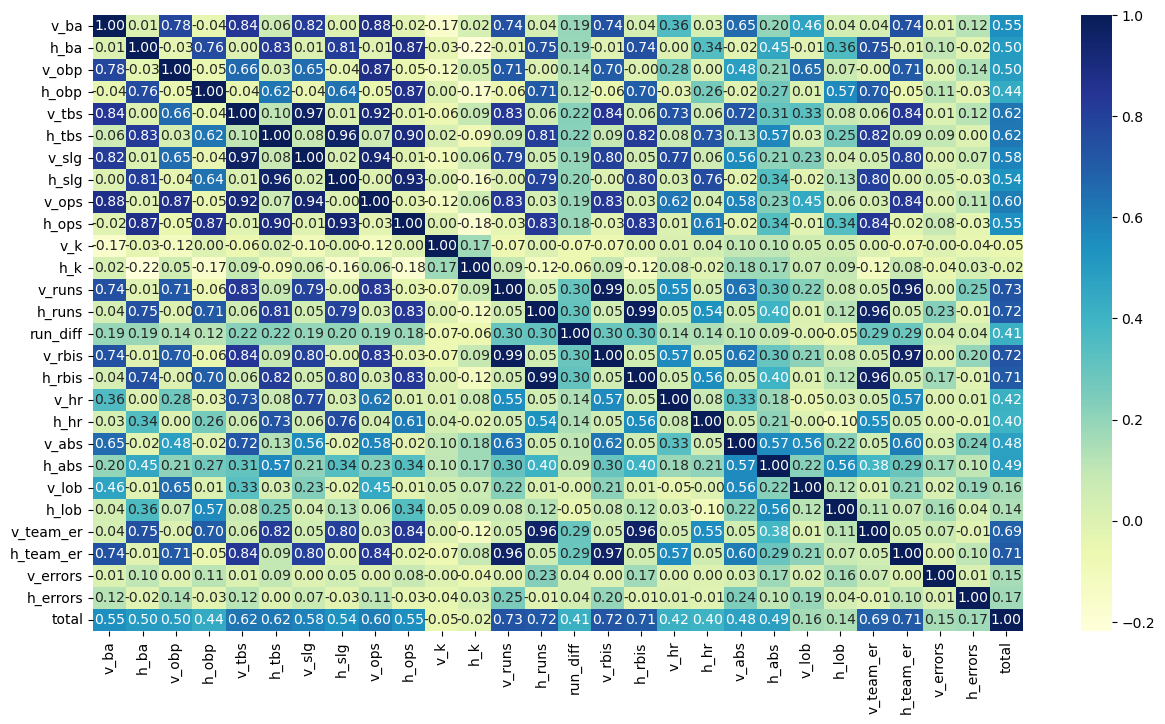

In [15]:
features = ['v_ba','h_ba','v_obp','h_obp','v_tbs','h_tbs','v_slg','h_slg','v_ops','h_ops','v_k', 'h_k','v_runs', 'h_runs','run_diff', 
            'v_rbis', 'h_rbis', 'v_hr', 'h_hr','v_abs', 'h_abs','v_lob', 'h_lob', 'v_team_er', 'h_team_er', 'v_errors', 'h_errors','total']

correlation_matrix = games[features].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show();

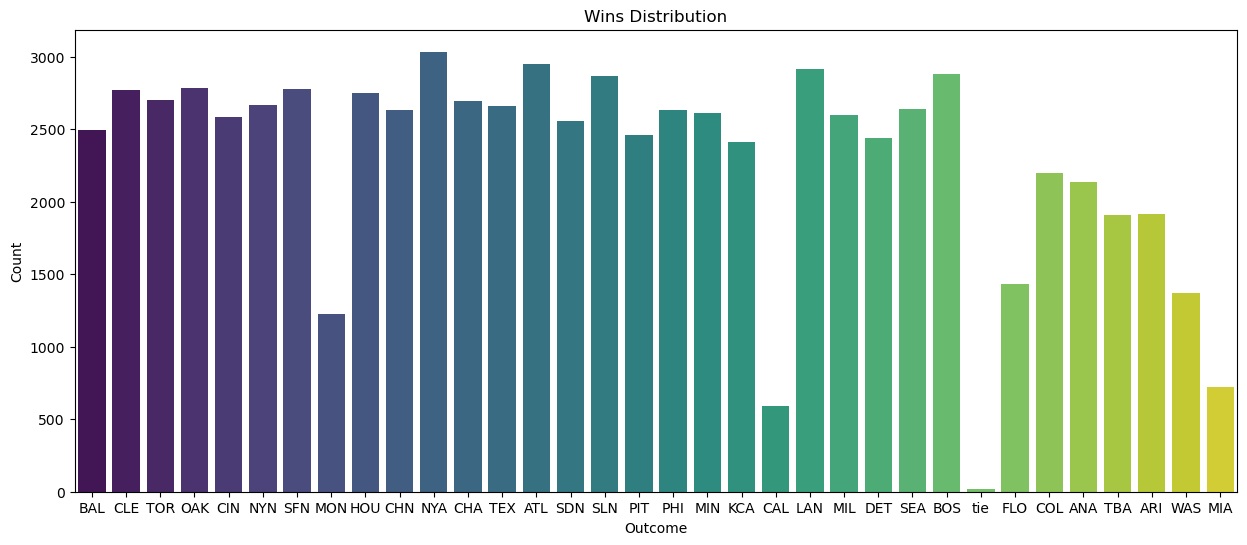

In [16]:
plt.figure(figsize=(15, 6))
sns.countplot(x='W', data=games, palette='viridis')
plt.title('Wins Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count');

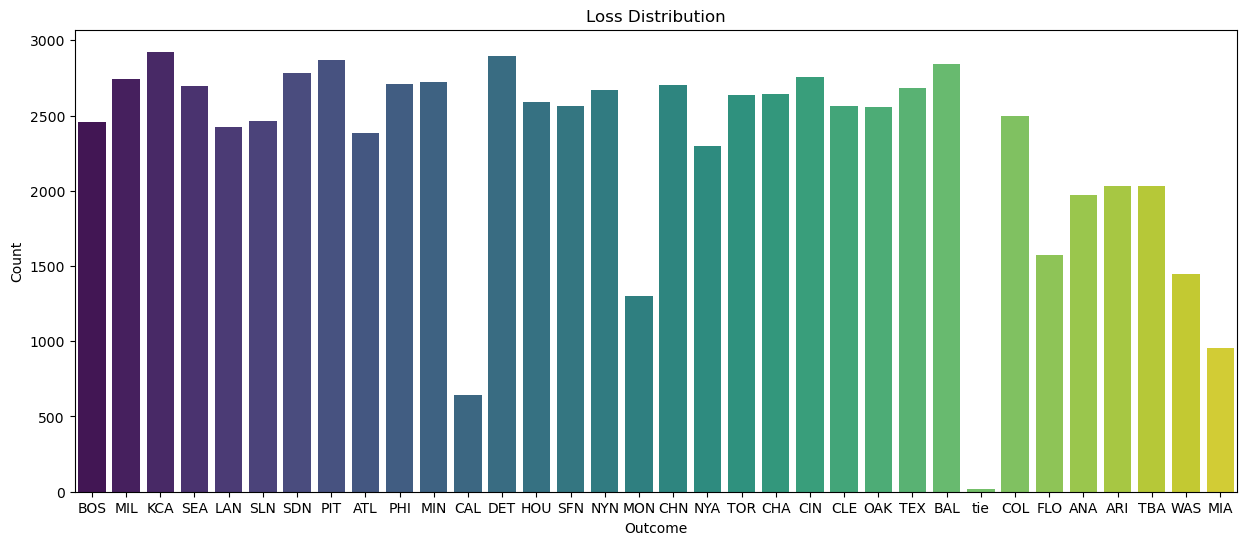

In [17]:
plt.figure(figsize=(15, 6))
sns.countplot(x='L', data=games, palette='viridis')
plt.title('Loss Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count');

In [18]:
ties = games[games['W'] == 'Tie']
ties
# 9/30/2001 WOW! 90 outs, 15 innings, score ends in tie at 1-1 lol

,date,visitor_team,v_league,home_team,h_league,v_runs,h_runs,total_outs,day_night,park_id,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,run_diff,total,v_ba,h_ba,v_obp,h_obp,v_1b,h_1b,v_tbs,h_tbs,v_slg,h_slg,v_ops,h_ops,h_W,W,L


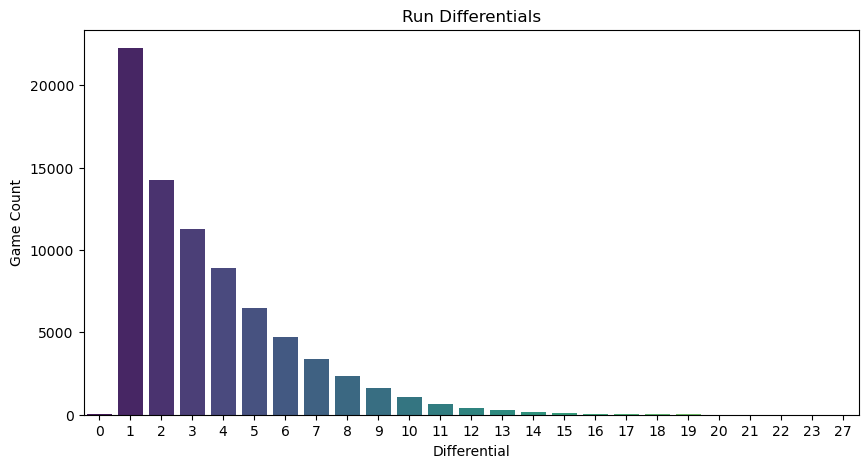

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='run_diff', data=games, palette='viridis')
plt.title('Run Differentials')
plt.xlabel('Differential')
plt.ylabel('Game Count');

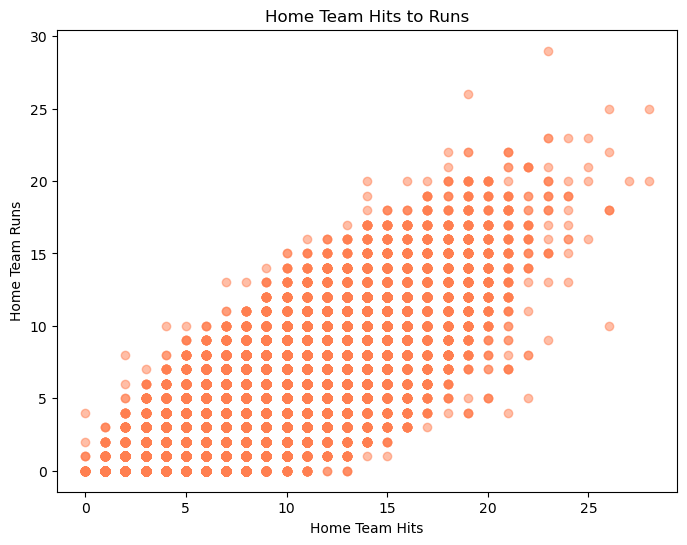

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(games['h_hits'], games['h_runs'], color='coral', alpha=0.5)
plt.title('Home Team Hits to Runs')
plt.xlabel('Home Team Hits')
plt.ylabel('Home Team Runs');

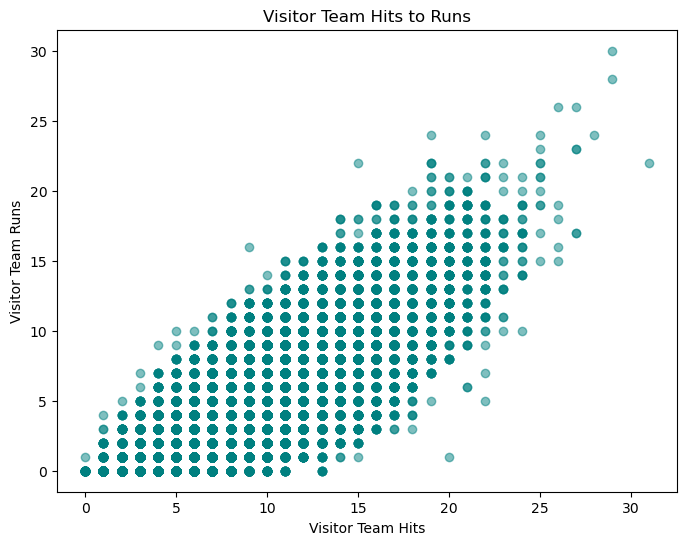

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(games['v_hits'], games['v_runs'], color='teal', alpha=0.5)
plt.title('Visitor Team Hits to Runs')
plt.xlabel('Visitor Team Hits')
plt.ylabel('Visitor Team Runs');

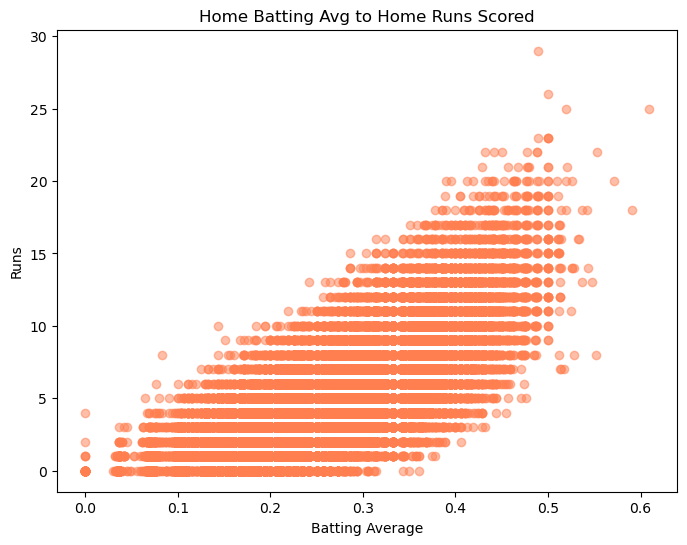

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(games['h_ba'], games['h_runs'], color='coral', alpha=0.5)
plt.title('Home Batting Avg to Home Runs Scored')
plt.xlabel('Batting Average')
plt.ylabel('Runs');

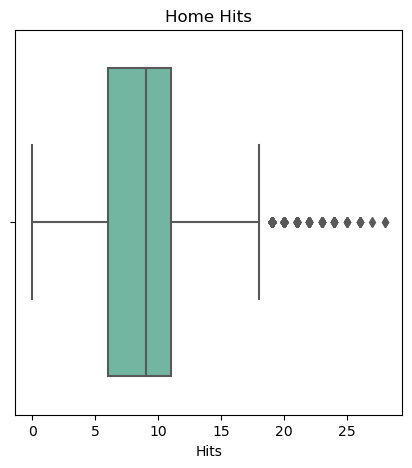

In [23]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='h_hits', data=games, palette='Set2')
plt.title('Home Hits')
plt.xlabel('Hits');

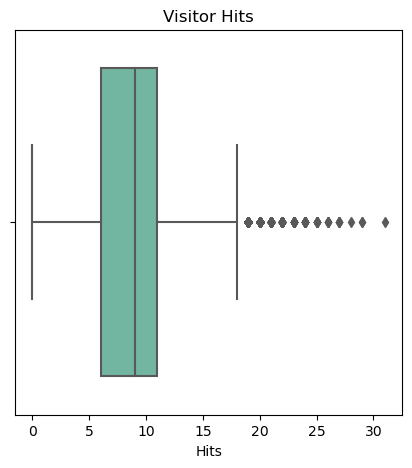

In [24]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='v_hits', data=games, palette='Set2')
plt.title('Visitor Hits')
plt.xlabel('Hits');

In [25]:
games.head()

,date,visitor_team,v_league,home_team,h_league,v_runs,h_runs,total_outs,day_night,park_id,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,run_diff,total,v_ba,h_ba,v_obp,h_obp,v_1b,h_1b,v_tbs,h_tbs,v_slg,h_slg,v_ops,h_ops,h_W,W,L
0,19890403,BOS,0,BAL,0,4,5,64,0,BAL11,40,10,3,0,1,4,2,0,0,3,1,5,1,1,0,8,5,5,5,0,0,31,14,0,0,2,0,40,12,2,0,1,5,0,0,0,4,0,7,1,1,2,8,3,4,4,0,0,33,13,0,1,0,0,1,9,0.250,0.300,0.350,0.400,6,9,16,17,0.400,0.425,0.750,0.825,1,BAL,BOS
1,19890403,MIL,0,CLE,0,1,2,51,0,CLE07,30,5,0,0,0,1,1,0,0,0,0,7,0,1,0,3,1,1,1,0,0,24,10,1,0,1,0,31,8,1,0,0,2,0,0,0,1,0,4,0,0,0,6,2,1,1,0,0,27,9,0,0,0,0,1,3,0.167,0.258,0.167,0.290,5,7,5,9,0.167,0.290,0.334,0.580,1,CLE,MIL
2,19890403,TOR,0,KCA,0,4,3,54,0,KAN06,36,10,3,1,0,4,0,1,0,1,0,5,0,0,0,7,3,3,3,0,0,27,9,0,0,1,0,34,9,4,0,0,3,1,0,0,1,0,6,1,0,1,6,2,4,4,0,0,27,10,0,0,0,0,1,7,0.278,0.265,0.306,0.294,6,5,15,13,0.417,0.382,0.723,0.676,0,TOR,KCA
3,19890403,SEA,0,OAK,0,2,3,51,1,OAK01,32,5,1,0,0,2,0,0,0,2,0,6,0,0,1,5,1,3,3,0,0,24,13,1,0,1,0,28,6,1,0,1,3,0,1,1,1,0,2,1,0,1,4,4,1,1,0,0,27,5,1,0,1,0,1,5,0.156,0.214,0.219,0.286,4,4,6,10,0.188,0.357,0.407,0.643,1,OAK,SEA
4,19890403,LAN,1,CIN,1,4,6,51,0,CIN08,33,5,0,0,1,3,0,0,0,2,0,7,2,0,0,4,4,4,4,0,0,24,11,2,0,1,0,34,10,1,0,1,5,0,1,0,3,0,5,1,0,1,8,3,2,2,0,0,27,7,3,0,0,0,2,10,0.152,0.294,0.212,0.382,4,8,8,14,0.242,0.412,0.454,0.794,1,CIN,LAN


# Team Data

In [26]:
# I am a SF Giants fan so let's take a look at them
sf_giants = games.loc[((games['visitor_team'] == 'SFN') | (games['home_team'] == 'SFN')), :]
sf_giants

,date,visitor_team,v_league,home_team,h_league,v_runs,h_runs,total_outs,day_night,park_id,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,run_diff,total,v_ba,h_ba,v_obp,h_obp,v_1b,h_1b,v_tbs,h_tbs,v_slg,h_slg,v_ops,h_ops,h_W,W,L
6,19890403,SFN,1,SDN,1,5,3,54,1,SAN01,35,10,3,1,1,5,1,0,0,4,0,6,0,1,0,8,3,3,3,0,0,27,9,0,0,2,0,30,8,0,0,1,3,0,1,0,7,0,8,0,0,1,8,3,5,5,0,0,27,10,0,0,0,0,2,8,0.286,0.267,0.400,0.500,5,7,18,11,0.514,0.367,0.914,0.867,0,SFN,SDN
7,19890404,SFN,1,SDN,1,8,3,54,1,SAN01,40,13,3,0,2,7,1,0,0,2,0,7,0,0,0,8,2,3,3,0,0,27,12,0,0,2,0,34,9,1,1,2,3,0,0,0,3,0,9,0,0,2,7,3,7,7,1,0,27,11,1,1,0,0,5,11,0.325,0.265,0.375,0.353,8,5,22,18,0.550,0.529,0.925,0.882,0,SFN,SDN
15,19890405,SFN,1,SDN,1,3,4,51,0,SAN01,34,7,0,0,2,3,1,0,2,4,1,12,1,0,0,11,3,3,3,0,0,24,15,2,0,2,0,31,11,2,0,0,3,1,1,0,1,0,1,0,0,2,6,4,3,3,0,0,27,8,2,0,0,0,1,7,0.206,0.355,0.412,0.387,5,9,13,13,0.382,0.419,0.794,0.806,1,SDN,SFN
38,19890407,SFN,1,CIN,1,3,4,95,1,CIN08,55,11,2,1,0,2,1,0,0,11,2,14,1,2,0,16,6,4,4,2,0,47,23,1,0,2,0,57,15,4,1,0,3,2,1,0,7,5,5,2,0,2,16,6,3,3,1,1,48,17,0,0,1,0,1,7,0.200,0.263,0.436,0.474,8,10,15,21,0.273,0.368,0.709,0.842,1,CIN,SFN
58,19890409,SFN,1,CIN,1,9,1,54,0,CIN08,34,10,2,1,1,6,2,0,0,7,2,5,0,1,1,7,3,1,1,0,0,27,12,1,0,2,0,31,5,2,0,0,1,0,0,0,2,0,4,0,0,2,5,4,6,6,0,1,27,13,2,0,1,0,8,10,0.294,0.161,0.559,0.226,6,3,17,7,0.500,0.226,1.059,0.452,0,SFN,CIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77976,20221001,ARI,1,SFN,1,8,4,54,0,SFO03,37,12,5,1,0,8,1,2,0,4,0,6,1,0,0,9,4,4,4,1,0,27,12,0,0,1,0,33,8,1,0,2,4,0,1,0,3,0,8,2,0,1,6,4,8,8,0,0,27,5,1,0,0,0,4,12,0.324,0.242,0.432,0.333,6,5,19,15,0.514,0.455,0.946,0.788,0,ARI,SFN
77991,20221002,ARI,1,SFN,1,3,4,57,0,SFO03,40,13,4,0,0,3,0,0,0,2,0,2,4,0,3,10,5,3,3,0,0,27,5,0,0,0,0,32,6,1,0,1,4,0,1,0,7,0,9,0,0,0,10,8,2,2,0,0,30,13,1,0,3,0,1,7,0.325,0.188,0.375,0.406,9,4,17,10,0.425,0.312,0.800,0.718,1,SFN,ARI
78005,20221003,SFN,1,SDN,1,4,7,51,1,SAN02,31,5,0,0,0,4,0,0,3,5,0,10,0,0,1,8,4,7,7,0,0,24,7,0,0,1,0,30,8,3,0,1,7,0,0,1,4,1,10,1,0,1,4,4,4,4,0,0,27,6,0,0,1,0,3,11,0.161,0.267,0.419,0.467,5,4,5,14,0.161,0.467,0.580,0.934,1,SDN,SFN
78028,20221004,SFN,1,SDN,1,2,6,51,1,SAN02,30,4,0,0,0,1,0,0,1,2,0,11,0,0,1,4,4,6,6,1,0,24,13,1,0,1,0,36,14,2,0,1,6,0,0,0,3,0,11,1,0,1,9,4,2,2,0,0,27,7,1,0,1,0,4,8,0.133,0.389,0.233,0.472,4,11,4,19,0.133,0.528,0.366,1.000,1,SDN,SFN


In [27]:
sf_wins = games[games['W'] == 'SFN']['W'].count()
sf_loss = games[games['L'] == 'SFN']['L'].count()
print(sf_wins, sf_loss)
# in the time span of this df the giants record is 2775 and 2564

2775 2564


In [28]:
games.to_csv('../Data/MLBgames.csv', index = False)